In [1]:
import os
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [2]:
# Load training labels
train_df = pd.read_csv("C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train.csv")


print("Train shape:", train_df.shape)
train_df.head()


Train shape: (1738, 2)


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3


In [4]:
# Each image can have one or more labels separated by space
train_df['Target'] = train_df['Target'].astype(str)

# Example of multiple labels
print(train_df['Target'].iloc[0])


0 


In [5]:
# Define all possible classes
classes = [
    "Abdomen","Ankle","Cervical Spine","Chest","Clavicles","Elbow","Feet","Finger",
    "Forearm","Hand","Hip","Knee","Lower Leg","Lumbar Spine","Others","Pelvis",
    "Shoulder","Sinus","Skull","Thigh","Thoracic Spine","Wrist"
]
class_map = {name: idx for idx, name in enumerate(classes)}

# Convert string labels like "0 12" → multi-hot encoded vector
def encode_labels(label_string):
    labels = [int(l) for l in label_string.split()]
    multi_hot = np.zeros(len(classes))
    multi_hot[labels] = 1
    return multi_hot

train_df['encoded'] = train_df['Target'].apply(encode_labels)


Total DICOM files found: 1738
First 5 paths: ['C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train\\1\\1.2.826.0.1.3680043.8.498.89102450329340531816015855773961083133\\1.2.826.0.1.3680043.8.498.11278653404499913987623237519434199794\\1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109-c.dcm', 'C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train\\10\\1.2.826.0.1.3680043.8.498.76069331983504052257862864339958118660\\1.2.826.0.1.3680043.8.498.53226016713491843923921471946020913334\\1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719-c.dcm', 'C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train\\1000\\1.2.826.0.1.3680043.8.498.65118383129253984511838370322822473514\\1.2.826.0.1.3680043.8.498.91495110196734963450648437157142379664\\1.2.826.0.1.3680043.8.498.57792439353439709695715592578627325770-c.dcm', 'C:\\Users\\Rashane\\GitHub\\Data\\Dataset\\train\\1002\\1.2.826.0.1.3680043.8.498.66151583660414380258303341865105351564\\1.2.826.0.1.3680043.8.498.402854746502186858100816

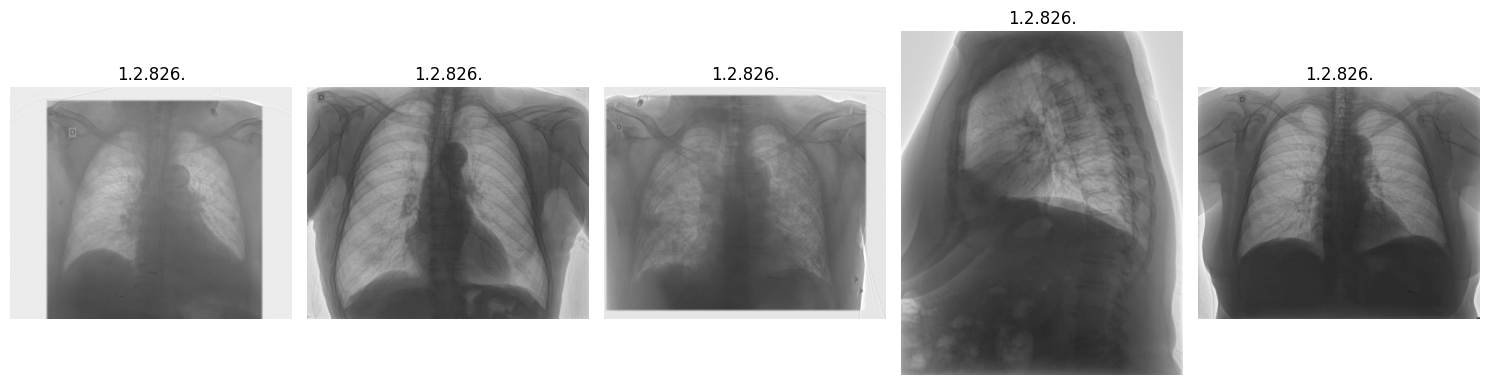

In [21]:
import os
import pydicom
import matplotlib.pyplot as plt

# Path to your training folder
base_path = r"C:\Users\Rashane\GitHub\Data\Dataset"
train_images_path = os.path.join(base_path, "train")

dcm_files = []
for root, dirs, files in os.walk(train_images_path):
    for f in files:
        if f.lower().endswith(".dcm") or f.isdigit():  # some datasets have no extension
            dcm_files.append(os.path.join(root, f))

print("Total DICOM files found:", len(dcm_files))
print("First 5 paths:", dcm_files[:5])

# Display first 5 images
plt.figure(figsize=(15, 8))
for i, dcm_path in enumerate(dcm_files[:5]):
    dcm = pydicom.dcmread(dcm_path)
    img = dcm.pixel_array

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(os.path.basename(dcm_path)[:8])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [19]:
import os

sample_folder = os.path.join(train_images_path, "1")  # check folder "1"
print("Files inside:", os.listdir(sample_folder)[:10])


Files inside: ['1.2.826.0.1.3680043.8.498.89102450329340531816015855773961083133']
